In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import experimenter
import pandas as pd 
import matplotlib.pyplot as plt 

sns.set_theme()

In [2]:
# Maximum number of replicas that the system can manage.
MAX_REPLICA_COUNT = 100

# Number of experiments
NUMBER_OF_EXPERIMENTS = 5

# Each experiment will be done by this many times for consistency.
EXPERIMENT_PROOF = 5 # REPITITION

# Int array of replicas for each experiment
REPLICAS: np.ndarray = experimenter.calculate_number_of_replicas(MAX_REPLICA_COUNT, NUMBER_OF_EXPERIMENTS)

# How much should we wait for the kubernetes api to be stabilized
COOLDOWNS: np.ndarray = 2 * np.ones((NUMBER_OF_EXPERIMENTS,), dtype=int) + (REPLICAS * 0.004).astype(int) # Make it ~3 mins

# Namespace of the experimentation
NAMESPACE = "experiments"

# Driver used in kubectl
DRIVER = "minikube" # minikube, kwok, native

# Framework
FRAMEWORK = "native" # native, edgenet (Nisan ortasi) | liqo, kubefed (Sonradan)
# EdgeNet scalability test, how many compute cluster can be tested...

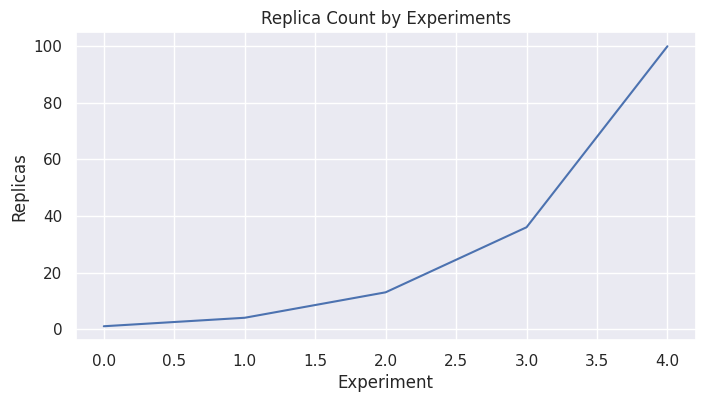

[2 2 2 2 2]
[  1   4  13  36 100]


In [3]:
def draw_replicas(replicas=REPLICAS):
    plt.figure(figsize=(8, 4))
    plt.plot(range(len(replicas)), replicas)
    plt.title("Replica Count by Experiments")
    plt.xlabel("Experiment")
    plt.ylabel("Replicas")
    plt.show()

draw_replicas()
print(COOLDOWNS)
print(REPLICAS)

In [4]:
# Do the experiment
experimenter.experiment_with(FRAMEWORK, DRIVER, 1, [1, 1], [1, 1])
# experimenter.experiment_with(FRAMEWORK, DRIVER, EXPERIMENT_PROOF, REPLICAS.tolist(), COOLDOWNS.tolist())

Estimated time 2 second(s) will be saved in './exps/20230302_100230.feather'.
Experiment of 1 step(s) with 1 replica(s) in 'native' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 1 second(s)
evet_type: ADDED
evet_type: MODIFIED
evet_type: MODIFIED
evet_type: MODIFIED
evet_type: MODIFIED
evet_type: MODIFIED
evet_type: MODIFIED
evet_type: DELETED
Experiment of 1 step(s) with 1 replica(s) in 'native' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 1 second(s)
evet_type: ADDED
evet_type: MODIFIED
evet_type: MODIFIED
evet_type: MODIFIED
evet_type: MODIFIED
evet_type: MODIFIED
evet_type: MODIFIED
evet_type: DELETED
Done!


In [5]:
KNATIVE_EXPERIMENT_NAME = "exps/20230302_100230.feather"

def process_experiment(filename):
    data_df = pd.read_feather(filename)

    data_df["api_server_creation_delta"] = data_df["event_created_at"] - data_df["before_create_timestamp"]
    data_df["api_server_deletion_delta"] = data_df["event_deleted_at"] - data_df["before_delete_timestamp"]
    
    data_df.to_feather(filename)
    return data_df

knative_minikube_df = process_experiment(KNATIVE_EXPERIMENT_NAME)
knative_minikube_df

,before_create_timestamp,before_firstwait_timestamp,before_delete_timestamp,before_secondwait_timestamp,before_cooldown_timestamp,before_join_timestamp,replicas,framework,error_occured,errors_rised,...,event_modified_at,event_replicas_at,first_created_at,last_created_at,first_deleted_at,last_deleted_at,first_scheduled_at,last_scheduled_at,api_server_creation_delta,api_server_deletion_delta
0,2023-03-02 10:02:31.345198,2023-03-02 10:02:31.384805,2023-03-02 10:02:34.788162,2023-03-02 10:02:34.841647,2023-03-02 10:02:34.841654,2023-03-02 10:02:35.841783,1,native,False,"[None, None, None]",...,"[2023-03-02 10:02:31.397870, 2023-03-02 10:02:...","[nan, nan, nan, 1.0]",2023-03-02 10:02:31.403064,2023-03-02 10:02:31.403064,2023-03-02 10:03:07.119025,2023-03-02 10:03:07.119025,2023-03-02 10:02:31.412985,2023-03-02 10:02:31.412985,0 days 00:00:00.034726,0 days 00:00:00.052983
1,2023-03-02 10:03:07.654480,2023-03-02 10:03:07.705006,2023-03-02 10:03:12.199414,2023-03-02 10:03:12.239713,2023-03-02 10:03:12.239720,2023-03-02 10:03:13.239815,1,native,False,"[None, None, None]",...,"[2023-03-02 10:03:07.721045, 2023-03-02 10:03:...","[nan, nan, nan, 1.0]",2023-03-02 10:03:07.726527,2023-03-02 10:03:07.726527,2023-03-02 10:03:44.537935,2023-03-02 10:03:44.537935,2023-03-02 10:03:07.747241,2023-03-02 10:03:07.747241,0 days 00:00:00.044877,0 days 00:00:00.039428


In [ ]:
# knative_minikube_df.to_feather("./saved_experiments/native_minikube_20230228_011357.feather")

In [ ]:
# BETTER PROCESS THIS DATA
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(knative_minikube_df["api_server_deletion_delta"]); plt.title("Creation Times")
plt.subplot(1, 2, 2)
plt.plot(knative_minikube_df["api_server_creation_delta"]); plt.title("Deletion Times")
plt.show()